In [23]:
!nvidia-smi

Sat Apr 29 15:07:11 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   72C    P0    31W /  70W |   1891MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [24]:
import numpy as np
import pandas as pd 

%cd drive/MyDrive/Colab\ Notebooks/SLMNIST/archive

[Errno 2] No such file or directory: 'drive/MyDrive/Colab Notebooks/SLMNIST/archive'
/content/drive/MyDrive/Colab Notebooks/SLMNIST/archive


In [25]:
%ls
train_data = pd.read_csv('sign_mnist_train.csv')
test_data = pd.read_csv('sign_mnist_test.csv')

american_sign_language.PNG  sign_mnist_test/     sign_mnist_train.csv
amer_sign2.png              sign_mnist_test.csv
amer_sign3.png              sign_mnist_train/


In [26]:
test_labels = test_data['label']
del test_data['label']
train_labels = train_data['label']
del train_data['label']

In [27]:
train_data = train_data.values
test_data = test_data.values

In [28]:
train_data.shape

(27455, 784)

In [29]:
test_data.shape

(7172, 784)

In [30]:
from keras.utils import to_categorical

train_data = train_data.reshape(27455, 28, 28, 1)
train_data = train_data.astype('float32') / 255

test_data = test_data.reshape(7172, 28, 28, 1)
test_data = test_data.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

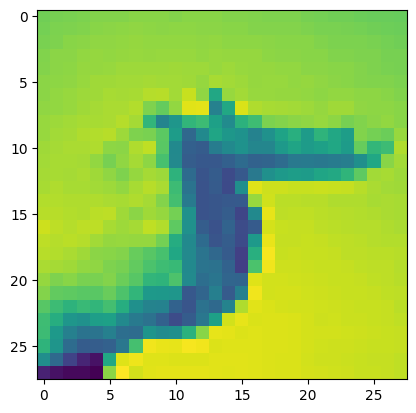

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
img_number = 568
plt.imshow(train_data[img_number])

In [32]:
from keras import models
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras import regularizers


model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1), kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.1))

model.add(layers.Dense(25, activation='softmax'))


model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 128)         147584    
                                                                 
 flatten_2 (Flatten)         (None, 1152)             

In [34]:
history = model.fit(train_data, train_labels,
                    epochs=20,
                    batch_size=256,
                    validation_split = 0.1)

Epoch 1/20
97/97 [==============================] - 2s 14ms/step - loss: 2.4608 - accuracy: 0.2923 - val_loss: 1.2127 - val_accuracy: 0.6540
Epoch 2/20
97/97 [==============================] - 1s 11ms/step - loss: 0.9119 - accuracy: 0.7409 - val_loss: 0.5455 - val_accuracy: 0.8769
Epoch 3/20
97/97 [==============================] - 1s 11ms/step - loss: 0.4960 - accuracy: 0.8816 - val_loss: 0.3430 - val_accuracy: 0.9428
Epoch 4/20
97/97 [==============================] - 1s 13ms/step - loss: 0.3339 - accuracy: 0.9386 - val_loss: 0.2119 - val_accuracy: 0.9883
Epoch 5/20
97/97 [==============================] - 1s 15ms/step - loss: 0.2432 - accuracy: 0.9700 - val_loss: 0.1986 - val_accuracy: 0.9858
Epoch 6/20
97/97 [==============================] - 2s 16ms/step - loss: 0.2010 - accuracy: 0.9827 - val_loss: 0.1496 - val_accuracy: 0.9982
Epoch 7/20
97/97 [==============================] - 2s 19ms/step - loss: 0.1726 - accuracy: 0.9895 - val_loss: 0.1351 - val_accuracy: 0.9993
Epoch 8/20
97

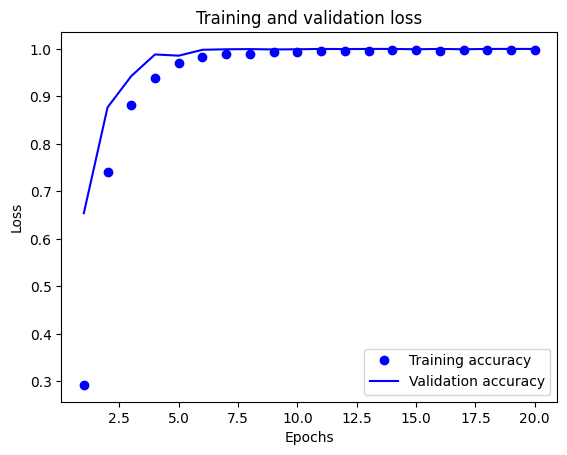

In [35]:
import matplotlib.pyplot as plt
loss = history.history['accuracy']
val_loss = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training accuracy')
plt.plot(epochs, val_loss, 'b', label='Validation accuracy')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [36]:
test_loss, test_acc = model.evaluate(test_data, test_labels)
test_acc

225/225 [==============================] - 1s 3ms/step - loss: 0.3113 - accuracy: 0.9335


0.9334913492202759